# <center> Data Science for Good City of Los Angeles</center>

In [1]:
# Importing the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os
import numpy as np
from datetime import datetime
from collections  import Counter
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from wand.image import Image as Img
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from sklearn.manifold import TSNE
from nltk import pos_tag
from nltk.help import upenn_tagset
import gensim
import matplotlib.colors as mcolors
from nltk import jaccard_distance
from nltk import ngrams
#import textstat
plt.style.use('ggplot')

C:\Users\admin\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#set working directory-
os.chdir("D:\MBA REF\edwisor\project\Data Science for Good City of Los Angeles")

#check current working directory-
os.getcwd()

'D:\\MBA REF\\edwisor\\project\\Data Science for Good City of Los Angeles'

In [9]:
# checking all subdirectories
files=[dir for dir in os.walk('cityofLA')]
for file in files:
    print(os.listdir(file[0]))
    print("\n")

['.DS_Store', 'Additional data', 'Job Bulletins']


['.DS_Store', 'City Job Paths', 'Description of promotions in job bulletins.docx', 'job bulletins with annotations', 'job_titles.csv', 'kaggle_data_dictionary.csv', 'PDFs', 'sample job class export template.csv']


['Accountant.pdf', 'Accounting_Aide.pdf', 'Accounting_Clerk.pdf', 'Administrative_Clerk.pdf', 'Airport_Police_Officer.pdf', 'Airport_Safety_Officer.pdf', 'Air_Conditioning_Mechanic.pdf', 'Animal_Care_Technician.pdf', 'Animal_Control_Officer.pdf', 'Animal_Keeper.pdf', 'Applications_Programmer.pdf', 'Assistant_Inspector.pdf', 'Assistant_Street_Lighting_Electrician.pdf', 'Assistant_Utility_Buyer.pdf', 'Auditor.pdf', 'Auto_Body_Builder_And_Repairer.pdf', 'Auto_Electrician.pdf', 'Bindery_Equipment_Operator.pdf', 'Bindery_Worker.pdf', 'Building_Inspector.pdf', 'Building_Mechanical_Inspector.pdf', 'Building_Operating_Engineer.pdf', 'Bus_Operator.pdf', 'Cabinet_Maker.pdf', 'Carpenter.pdf', 'Cartographer.pdf', 'Cement_Finisher_Worke

In [10]:
# Directories with text and csv files
bulletins=os.listdir("CityofLA/Job Bulletins/")
additional=os.listdir("CityofLA/Additional data/")

In [11]:
# We will find and print all the files inside Additional data that has csv format
csvfiles=[]
for file in additional:
    if file.endswith('.csv'):
        print(file)
        csvfiles.append("CityofLA/Additional data/"+file)

job_titles.csv
kaggle_data_dictionary.csv
sample job class export template.csv


In [12]:
# Reading the required csv files
job_title=pd.read_csv(csvfiles[0])
sample_job=pd.read_csv(csvfiles[1])
kaggle_data=pd.read_csv(csvfiles[2])

# Data Understanding

In [13]:
job_title.head()

,311 DIRECTOR
0,ACCOUNTANT
1,ACCOUNTING CLERK
2,ACCOUNTING RECORDS SUPERVISOR
3,ADMINISTRATIVE ANALYST
4,ADMINISTRATIVE CLERK


In [14]:
print("The are %d rows and %d cols in job_title file" %(job_title.shape))

The are 667 rows and 1 cols in job_title file


In [15]:
sample_job[sample_job['Field Name']=='SCHOOL_TYPE']['Description']

7    School Type: School type required (e.g. colleg...
Name: Description, dtype: object

In [16]:
print("The are %d rows and %d cols in sample_job file" %(sample_job.shape))

The are 25 rows and 7 cols in sample_job file


In [17]:
kaggle_data.head()

,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,REQUIREMENT_SET_ID,REQUIREMENT_SUBSET_ID,JOB_DUTIES,EDUCATION_YEARS,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,...,COURSE_LENGTH,COURSE_SUBJECT,MISC_COURSE_DETAILS,DRIVERS_LICENSE_REQ,DRIV_LIC_TYPE,ADDTL_LIC,EXAM_TYPE,ENTRY_SALARY_GEN,ENTRY_SALARY_DWP,OPEN_DATE
0,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,1,A,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,COMPUTER SCIENCE|INFORMATION SYSTEMS|GEOGRAPHI...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
1,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,A,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
2,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,B,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
3,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,2,C,"A Systems Analyst analyzes procedures, methods...",4.0,COLLEGE OR UNIVERSITY,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17
4,SYSTEMS ANALYST 1596 102717.txt,Systems Analyst,1596,3,A,"A Systems Analyst analyzes procedures, methods...",NaN,NaN,NaN,2.0,...,"3M, 4Q",INFORMATION SYSTEMS|SYSTEMS ANALYSIS|closely r...,At least three of the courses must be from the...,M,NaN,NaN,OPEN_INT_PROM,68611-100307,70908-88092,10/27/17


In [18]:
print("The are %d rows and %d cols in kaggle_data file" %(kaggle_data.shape))

The are 5 rows and 25 cols in kaggle_data file


In [19]:
print("There are %d text files in bulletin directory" %len(bulletins))

There are 683 text files in bulletin directory


# Data Preprocessing

In [20]:
# Extracting the headings from job bulletins
def get_headings(bulletin):       
    
    with open("CityofLA/Job Bulletins/"+bulletins[bulletin]) as f:    ##reading text files 
        data=f.read().replace('\t','').split('\n')
        data=[head for head in data if head.isupper()]
        return data
        
def clean_text(bulletin):      
    
                                 
    
    with open("CityofLA/Job Bulletins/"+bulletins[bulletin]) as f:
        data=f.read().replace('\t','').replace('\n','')
        return data

In [21]:
# Headings
get_headings(1)

['ACCOUNTANT',
 'ANNUAL SALARY',
 'NOTES:',
 'DUTIES',
 'REQUIREMENT/MINIMUM QUALIFICATION',
 'PROCESS NOTES',
 'WHERE TO APPLY',
 'NOTE:',
 'APPLICATION DEADLINE',
 'SELECTION PROCESS',
 'NOTES:',
 'NOTICE:',
 'THIS EXAMINATION IS TO BE GIVEN ONLY',
 'ON AN OPEN COMPETITIVE BASIS',
 'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER']

In [22]:
get_headings(2)

['ACCOUNTING CLERK',
 'ANNUAL SALARY',
 'NOTE:',
 'DUTIES',
 'REQUIREMENT/MINIMUM QUALIFICATION',
 'PROCESS NOTES',
 'WHERE TO APPLY',
 'NOTE:',
 'APPLICATION DEADLINE',
 'SELECTION PROCESS',
 'NOTES:',
 'NOTICE:',
 'THIS EXAMINATION IS TO BE GIVEN BOTH ON AN',
 'INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS',
 'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER']

In [23]:
# data preparation function
def to_dataframe(num,df):
    

    
    opendate=re.compile(r'(Open [D,d]ate:)(\s+)(\d\d-\d\d-\d\d)')       #match open date
    
    salary=re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')       #match salary
    
    requirements=re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)')      #match requirements
    
    for no in range(0,num):
        with open("CityofLA/Job Bulletins/"+bulletins[no],encoding="ISO-8859-1") as f:         #reading files 
                try:
                    file=f.read().replace('\t','')
                    data=file.replace('\n','')
                    headings=[heading for heading in file.split('\n') if heading.isupper()]             ##getting heading from job bulletin

                    sal=re.search(salary,data)
                    date=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%y')
                    try:
                        req=re.search(requirements,data).group(2)
                    except Exception as e:
                        req=re.search('(.*)NOTES?',re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)',
                                                              data)[0][1][:1200]).group(1)
                    
                    duties=re.search(r'(DUTIES)(.*)(REQ[A-Z])',data).group(2)
                    try:
                        enddate=re.search(
                                r'(JANUARY|FEBRUARY|MARCH|APRIL|MAY|JUNE|JULY|AUGUST|SEPTEMBER|OCTOBER|NOVEMBER|DECEMBER)\s(\d{1,2},\s\d{4})'
                                ,data).group()
                    except Exception as e:
                        enddate=np.nan
                    
                    selection= [z[0] for z in re.findall('([A-Z][a-z]+)((\s\.\s)+)',data)]     ##match selection criteria
                    
                    df=df.append({'File Name':bulletins[no],'Position':headings[0].lower(),'salary_start':sal.group(1),
                               'salary_end':sal.group(5),"opendate":date,"requirements":req,'duties':duties,
                                'deadline':enddate,'selection':selection},ignore_index=True)
                    
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)')
                    df['EXPERIENCE_LENGTH']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['FULL_TIME_PART_TIME']=df['EXPERIENCE_LENGTH'].apply(lambda x:  'FULL_TIME' if x is not np.nan else np.nan )
                    
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\s(college)')
                    df['EDUCATION_YEARS']=df['requirements'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else np.nan)
                    df['SCHOOL_TYPE']=df['EDUCATION_YEARS'].apply(lambda x : 'College or University' if x is not np.nan else np.nan)
                    
                except Exception as e:
                    print('umatched sequence')
                    
                    
                
                
        
           
    return df

            
            
            
            

In [24]:
df=pd.DataFrame(columns=['File Name','Position','salary_start','salary_end','opendate','requirements','duties','deadline'])
df=to_dataframe(len(bulletins),df)
df.to_csv('job class output.csv')

umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence
umatched sequence


In [25]:
df.shape

(660, 13)

In [26]:
df.head()

,File Name,Position,salary_start,salary_end,opendate,requirements,duties,deadline,selection,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE
0,311 DIRECTOR 9206 041814.txt,311 director,"125,175","$155,514",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,"MAY 1, 2014",[Interview],One,FULL_TIME,NaN,NaN
1,ACCOUNTANT 1513 062218.txt,accountant,"49,903","$72,996",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,"AUGUST 25, 2018","[Test, Interview]",NaN,NaN,four,College or University
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"49,005","$71,618",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,NaN,[Test],Two,FULL_TIME,NaN,NaN
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"55,332","$80,930",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...","AUGUST 9, 2018","[Test, Interview]",Two,FULL_TIME,NaN,NaN
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"60,489","$88,468",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,"JUNE 14, 2018","[Test, Essay, Interview]",One,FULL_TIME,four,College or University


In [27]:
# Preparing the data dictionary
data_dictionary=pd.DataFrame({'Field Name':['File Name','Position','salary_start','salary_end','opendate',
                                            'requirements','duties','deadline','selection','EXPERIENCE_LENGTH','FULL_TIME_PART_TIME','EDUCATION_YEARS','SCHOOL_TYPE'],
                             })

data_dictionary['Description']=['The file name of the job bulletin from which each record came','The title of the particular class (e.g., Systems Analyst, Carpenter)',
                              'The overall salary start','The overall maximum salary','The date the job bulletin opened','Overall requirement that has to be filled',
                              'A summary of what someone does in the particular job\n','The date the job bulletin closed','list of selection criterias','Years required in a particular job class or external role.',
                              'Whether the required experience is full-time, part','Years required in a particular education program',
                               'School Type: School type required (e.g. college or university, high school)']

data_dictionary['Data Type']=['string']*13

data_dictionary['Accepts Null Values?']=['Yes']*13

In [28]:
data_dictionary

,Field Name,Description,Data Type,Accepts Null Values?
0,File Name,The file name of the job bulletin from which e...,string,Yes
1,Position,"The title of the particular class (e.g., Syste...",string,Yes
2,salary_start,The overall salary start,string,Yes
3,salary_end,The overall maximum salary,string,Yes
4,opendate,The date the job bulletin opened,string,Yes
5,requirements,Overall requirement that has to be filled,string,Yes
6,duties,A summary of what someone does in the particul...,string,Yes
7,deadline,The date the job bulletin closed,string,Yes
8,selection,list of selection criterias,string,Yes
9,EXPERIENCE_LENGTH,Years required in a particular job class or ex...,string,Yes


In [29]:
data_dictionary.to_csv('data dictionary.csv')

# Data Exploration 

In [30]:
# which are the common job sectors in LA?
print('There are %d different jobs available' %df['Position'].nunique())

There are 650 different jobs available


Text(0, 0.5, 'sector')

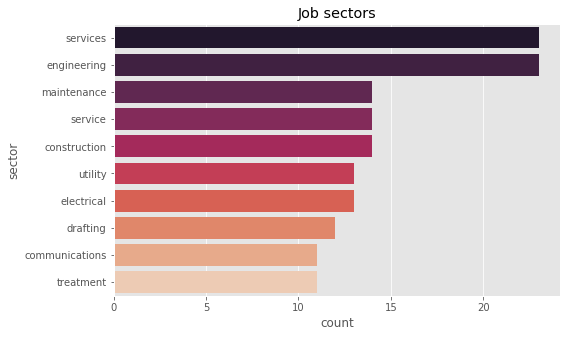

In [31]:
plt.figure(figsize=(8,5))
text=''.join(job for job in df['Position'])                                ##joining  data to form text
text=word_tokenize(text)
jobs=Counter(text)                                                         ##counting number of occurences
jobs_class=[job for job in jobs.most_common(12) if len(job[0])>3]          ##selecting most common words
#offers=[job[1] for job in jobs.most_common(12) if len(job[0]>3)]
a,b=map(list, zip(*jobs_class))
sns.barplot(b,a,palette='rocket')                                           ##creating barplot
plt.title('Job sectors')
plt.xlabel("count")
plt.ylabel('sector')

In [32]:
df['salary_start']=[int(sal.split(',')[0]+sal.split(',')[1] ) for sal in df['salary_start']]   
df['salary_end']=[sal.replace('$','')  if sal!= None else 0 for sal in df['salary_end']  ]
df['salary_end']=[int(sal.split(',')[0]+sal.split(',')[1] ) if type(sal)!=int else 0 for sal in df['salary_end']]

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


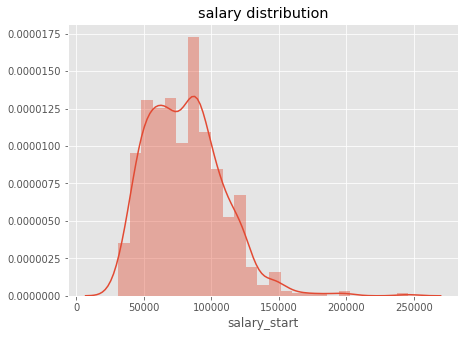

In [33]:
# Salary Distribution
plt.figure(figsize=(7,5))
sns.distplot(df['salary_start'])
plt.title('salary distribution')
plt.show()

Text(0.5, 1.0, 'Best paid jobs in LA')

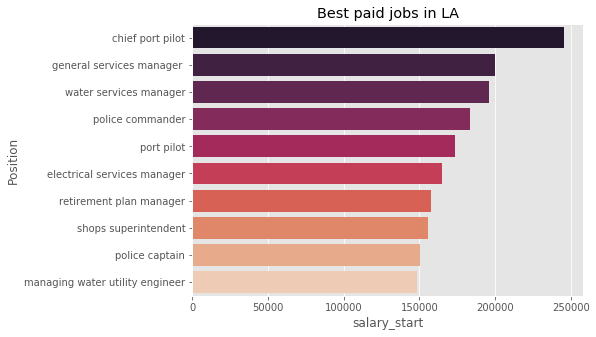

In [34]:
# best paid jobs in LA
most_paid=df[['Position','salary_start']].sort_values(by='salary_start',ascending=False)[:10]
plt.figure(figsize=(7,5))
sns.barplot(y=most_paid['Position'],x=most_paid['salary_start'],palette='rocket')
plt.title('Best paid jobs in LA')

In [35]:
#  jobs with highest salary deviation
df['salary_diff']=abs(df['salary_start']-df['salary_end'])

ranges=df[['Position','salary_diff']].sort_values(by='salary_diff',ascending=False)[:10]

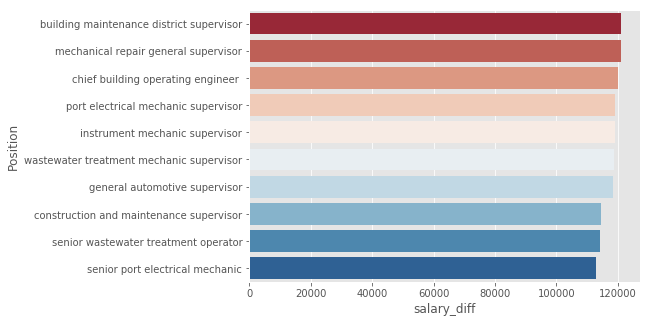

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(y=ranges['Position'],x=ranges['salary_diff'],palette='RdBu')   ##plotting

In [37]:
ranges

,Position,salary_diff
80,building maintenance district supervisor,121166
314,mechanical repair general supervisor,121166
99,chief building operating engineer,119997
363,port electrical mechanic supervisor,119172
279,instrument mechanic supervisor,119036
632,wastewater treatment mechanic supervisor,118843
247,general automotive supervisor,118577
147,construction and maintenance supervisor,114485
538,senior wastewater treatment operator,114234
516,senior port electrical mechanic,112955


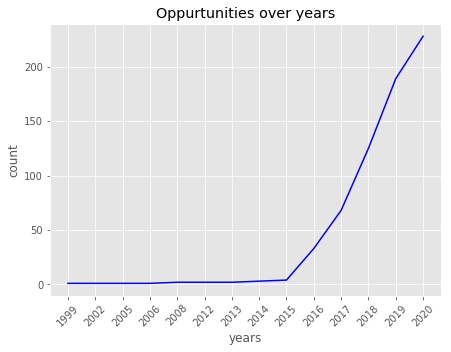

In [38]:
# Has job opportunities really increased recently?
df['year_of_open']=[date.year for date in df['opendate']]

count=df['year_of_open'].value_counts(ascending=True)
years=['2020','2019','2018', '2017', '2016', '2015', '2014', '2013', '2012', '2008', '2006',
           '2005', '2002', '1999']
plt.figure(figsize=(7,5))
plt.plot([z for z in reversed(years)],count.values,color='blue')

plt.title('Oppurtunities over years')
plt.xlabel('years')
plt.ylabel('count')
plt.gca().set_xticklabels([z for z in reversed(years)],rotation='45')
plt.show()

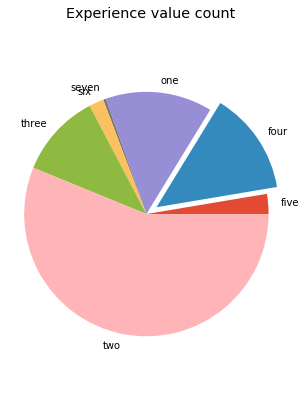

In [39]:
# What about the full time experience?
experience=df['EXPERIENCE_LENGTH'].value_counts().reset_index()
experience['index']=experience['index'].apply(lambda x : x.lower())
experience=experience.groupby('index',as_index=False).agg('sum')
labels=experience['index']
sizes=experience['EXPERIENCE_LENGTH']
plt.figure(figsize=(5,7))
plt.pie(sizes,explode=(0, 0.1, 0, 0,0,0,0),labels=labels)
plt.gca().axis('equal')
plt.title('Experience value count')
plt.show()

<BarContainer object of 2 artists>

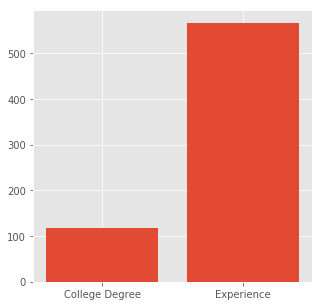

In [40]:
# Experience or College degree, which is more preferred ?
x1=df['SCHOOL_TYPE'].value_counts()[0]
x2=df['FULL_TIME_PART_TIME'].value_counts()[0]
plt.figure(figsize=(5,5))
plt.bar(height=[x1,x2],x=['College Degree','Experience'])

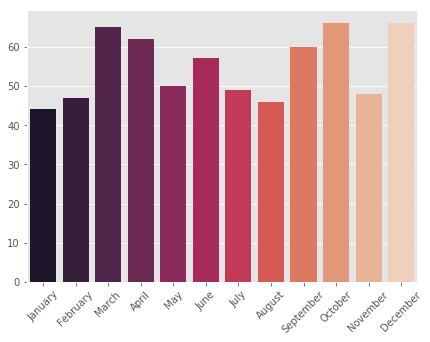

In [41]:
# Which month of the year offers most opportunities?
plt.figure(figsize=(7,5))
df['open_month']=[z.month for z in df['opendate']]
count=df['open_month'].value_counts(sort=False)
sns.barplot(y=count.values,x=count.index,palette='rocket')
plt.gca().set_xticklabels([calendar.month_name[x] for x in count.index],rotation='45')
plt.show()

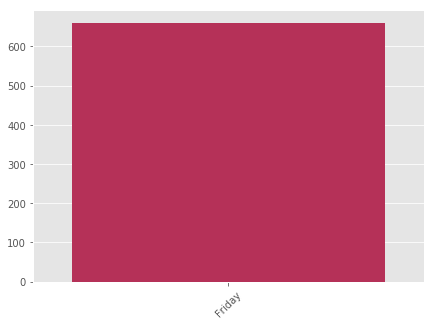

In [42]:
# Which day of the week ?
plt.figure(figsize=(7,5))

df['open_day']=[z.weekday() for z in df['opendate']]
count=df['open_day'].value_counts(sort=False)
sns.barplot(y=count.values,x=count.index,palette='rocket')
plt.gca().set_xticklabels([calendar.day_name[x] for x in count.index],rotation='45')
plt.show()

In [43]:
# Deadlines
print('%d job applications may close without prior notice' %df['deadline'].isna().sum())

44 job applications may close without prior notice


In [46]:
req=' '.join(text for text in df['requirements'])

# <center> Natural Language Processing </center>

## Word cloud of Requirement

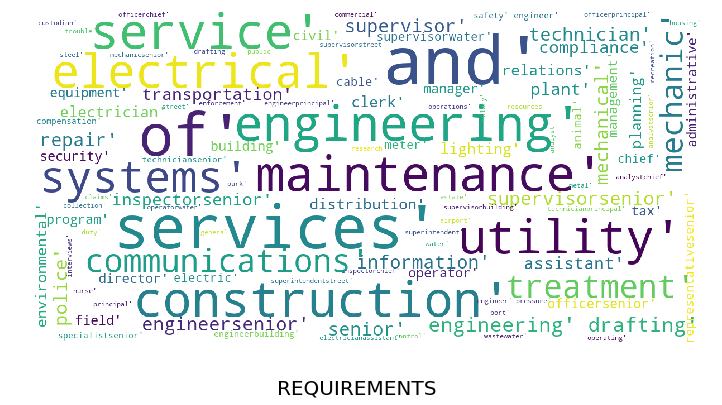

In [47]:

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=250,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(text,'REQUIREMENTS')

In [48]:
# Most influential words in requirements
lem=WordNetLemmatizer()
text=[lem.lemmatize(w) for w in word_tokenize(req)]
vect=TfidfVectorizer(ngram_range=(1,3),max_features=100)
vectorized_data=vect.fit_transform(text)
#id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vect.vocabulary_.keys()

dict_keys(['which', 'recognized', 'angeles', 'for', 'supervising', 'electrical', 'four', 'by', 'city', 'provides', 'program', 'state', 'department', 'planning', 'certificate', 'and', 'or2', 'service', 'four year', 'paid', 'maintenance', 'performing', 'course', 'engineering', 'accredited', 'or3', 'be', 'requirement', 'los', 'required', 'water', 'building', 'the', 'one', 'semester', 'quarter', 'month', 'professional', 'training', 'and2', 'may', 'science', 'is', 'and or', 'including', 'mechanical', 'environmental', 'on line', 'repair', 'engineer', 'college', 'design', 'two', 'public', 'must', 'substituted', 'administration', 'completion', 'system', 'with', 'experience', 'supervisor', 'level', 'california', 'degree', 'senior', 'work', 'full time', 'unit', 'school', 'in', 'to', 'three', 'an', 'of', 'six', 'field', 'equipment', 'university', 'from', 'following', 'valid', 'analysis', 'on', 'time', 'or', 'operation', 'line', 'at', 'full', 'that', 'year', 'position', 'class', 'related', 'manage

#### Word 2 Vec

In [50]:
def build_corpus(df,col):
    lem=WordNetLemmatizer()
    corpus= []
    for x in df[col]:
        
        
        words=word_tokenize(x)
        corpus.append([lem.lemmatize(w) for w in words])
    return corpus

In [51]:
corpus=build_corpus(df,'requirements')
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=30, workers=4)

#### TSNE

In [52]:
def tsne_plot(model,title='None'):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=80, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    plt.title(title)
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:316: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


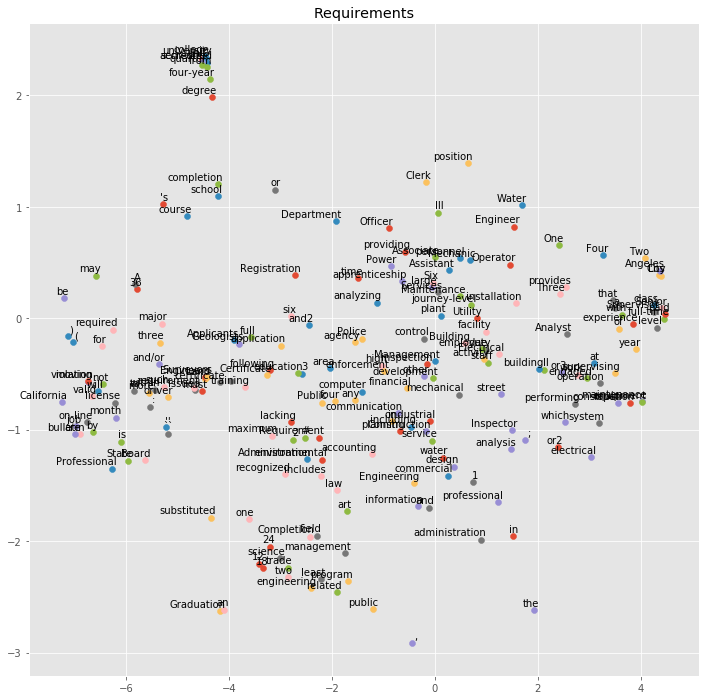

In [53]:
tsne_plot(model,'Requirements')

In [54]:
# What are the common requirements for any post?
token=word_tokenize(req)
counter=Counter(token)
count=[x[0] for x in counter.most_common(40) if len(x[0])>3]
print("Most common words in Requirement")
print(count)

Most common words in Requirement
['experience', 'paid', 'full-time', 'years', 'with', 'City', 'Angeles', 'level', 'from', 'year', 'college', 'accredited', 'university', 'class', 'professional', 'maintenance', 'which', 'units']


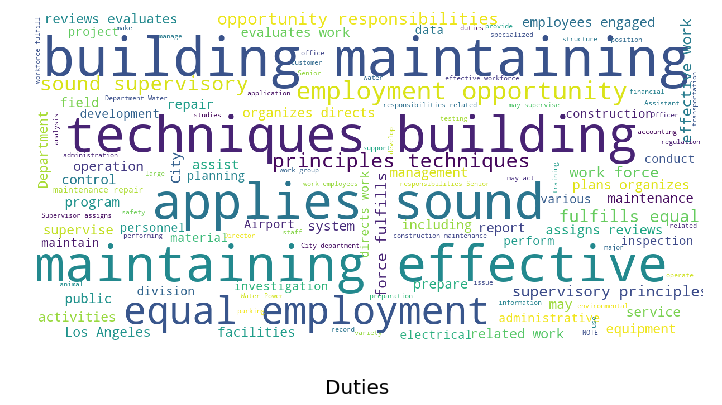

In [55]:
# Duties
duties= ' '.join(d for d in df['duties'])
show_wordcloud(duties,'Duties')

In [56]:
# Most influential and common words in duties
lem=WordNetLemmatizer()
text=[lem.lemmatize(w) for w in word_tokenize(duties)]
vect=TfidfVectorizer(ngram_range=(1,3),max_features=200)
vectorized_data=vect.fit_transform(text)
#id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vect.vocabulary_.keys()

dict_keys(['cable', 'group', 'which', 'meter', 'responsible', 'compliance', 'maintaining', 'material', 'are', 'angeles', 'regulation', 'for', 'information', 'wide', 'major', 'coordinate', 'processing', 'by', 'opportunity', 'city', 'communication', 'provides', 'program', 'chief', 'police', 'safety', 'department', 'all', 'office', 'and', 'inspects', 'through', 'force', 'review', 'service', 'computer', 'animal', 'enforcement', 'supervises', 'maintenance', 'principle', 'transportation', 'report', 'engineering', 'issue', 'personnel', 'repair', 'be', 'difficult', 'applies', 'lead', 'los', 'variety', 'distribution', 'director', 'required', 'water', 'community', 'process', 'building', 'administrative', 'port', 'fulfills', 'the', 'conduct', 'installation', 'position', 'contract', 'crew', 'workforce', 'airport', 'evaluates', 'professional', 'engaged', 'operates', 'operation', 'make', 'doe', 'testing', 'street', 'project', 'support', 'performs', 'may', 'is', 'and or', 'including', 'care', 'enviro

In [57]:
token=word_tokenize(duties)
counter=Counter(token)
count=[x[0] for x in counter.most_common(40) if len(x[0])>3]
print("Most common words in Duties")
print(count)

Most common words in Duties
['work', 'maintaining', 'building', 'techniques', 'applies', 'supervisory', 'effective', 'sound', 'principles', 'responsibilities', 'employment', 'fulfills', 'equal', 'opportunity', 'engaged', 'force', 'related', 'City', 'equipment', 'performs', 'plans', 'other', 'with', 'maintenance', 'employees']


#### Word2Vec

In [58]:
corpus=build_corpus(df,'duties')
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=40, workers=4)

#### TNSE

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:316: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


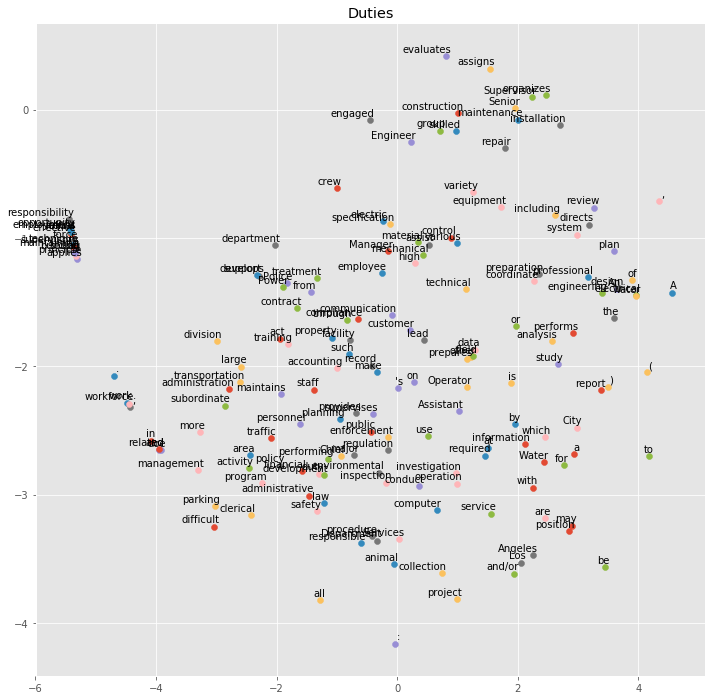

In [59]:
tsne_plot(model,'Duties')

## Latent Dirichlet Allocation (LDA

In [60]:
lem=WordNetLemmatizer()
text=[lem.lemmatize(w) for w in word_tokenize(duties)]
vect=TfidfVectorizer(ngram_range=(1,3),max_features=200)
vectorized_data=vect.fit_transform(text)
id2word=dict((v,k) for k,v in vect.vocabulary_.items())

In [61]:
corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(corpus,id2word=id2word,num_topics=8,random_state=34,passes=25,per_word_topics=True)

In [62]:
ldamodel.show_topic(1)

[('force', 0.088439256),
 ('department', 0.05869579),
 ('service', 0.050880834),
 ('construction', 0.04301375),
 ('operation', 0.042879),
 ('wastewater', 0.038239773),
 ('assist', 0.034947447),
 ('staff', 0.03137732),
 ('electrical', 0.030545501),
 ('traffic', 0.029208368)]

In [63]:
# What is the Dominant topic and its percentage contribution in each document
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=build_corpus(df,'duties'))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.dropna(inplace=True)
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1250,"the, fulfills, sound, other, evaluates, progra...","[A, 311, Director, is, responsible, for, the, ..."
1,1,0.0,0.1250,"the, fulfills, sound, other, evaluates, progra...","[An, Accountant, doe, professional, accounting..."
2,2,3.0,0.5625,"related, city, employee, plan, review, assigns...","[An, Accounting, Clerk, performs, difficult, a..."
3,3,5.0,0.5625,"and, an, performs, directs, supervisor, engine...","[An, Accounting, Records, Supervisor, assigns,..."
4,4,7.0,0.5625,"for, responsibility, applies, engaged, activit...","[An, Administrative, Analyst, performs, profes..."


In [64]:
# Topic modeling visualization
data=build_corpus(df,'duties')

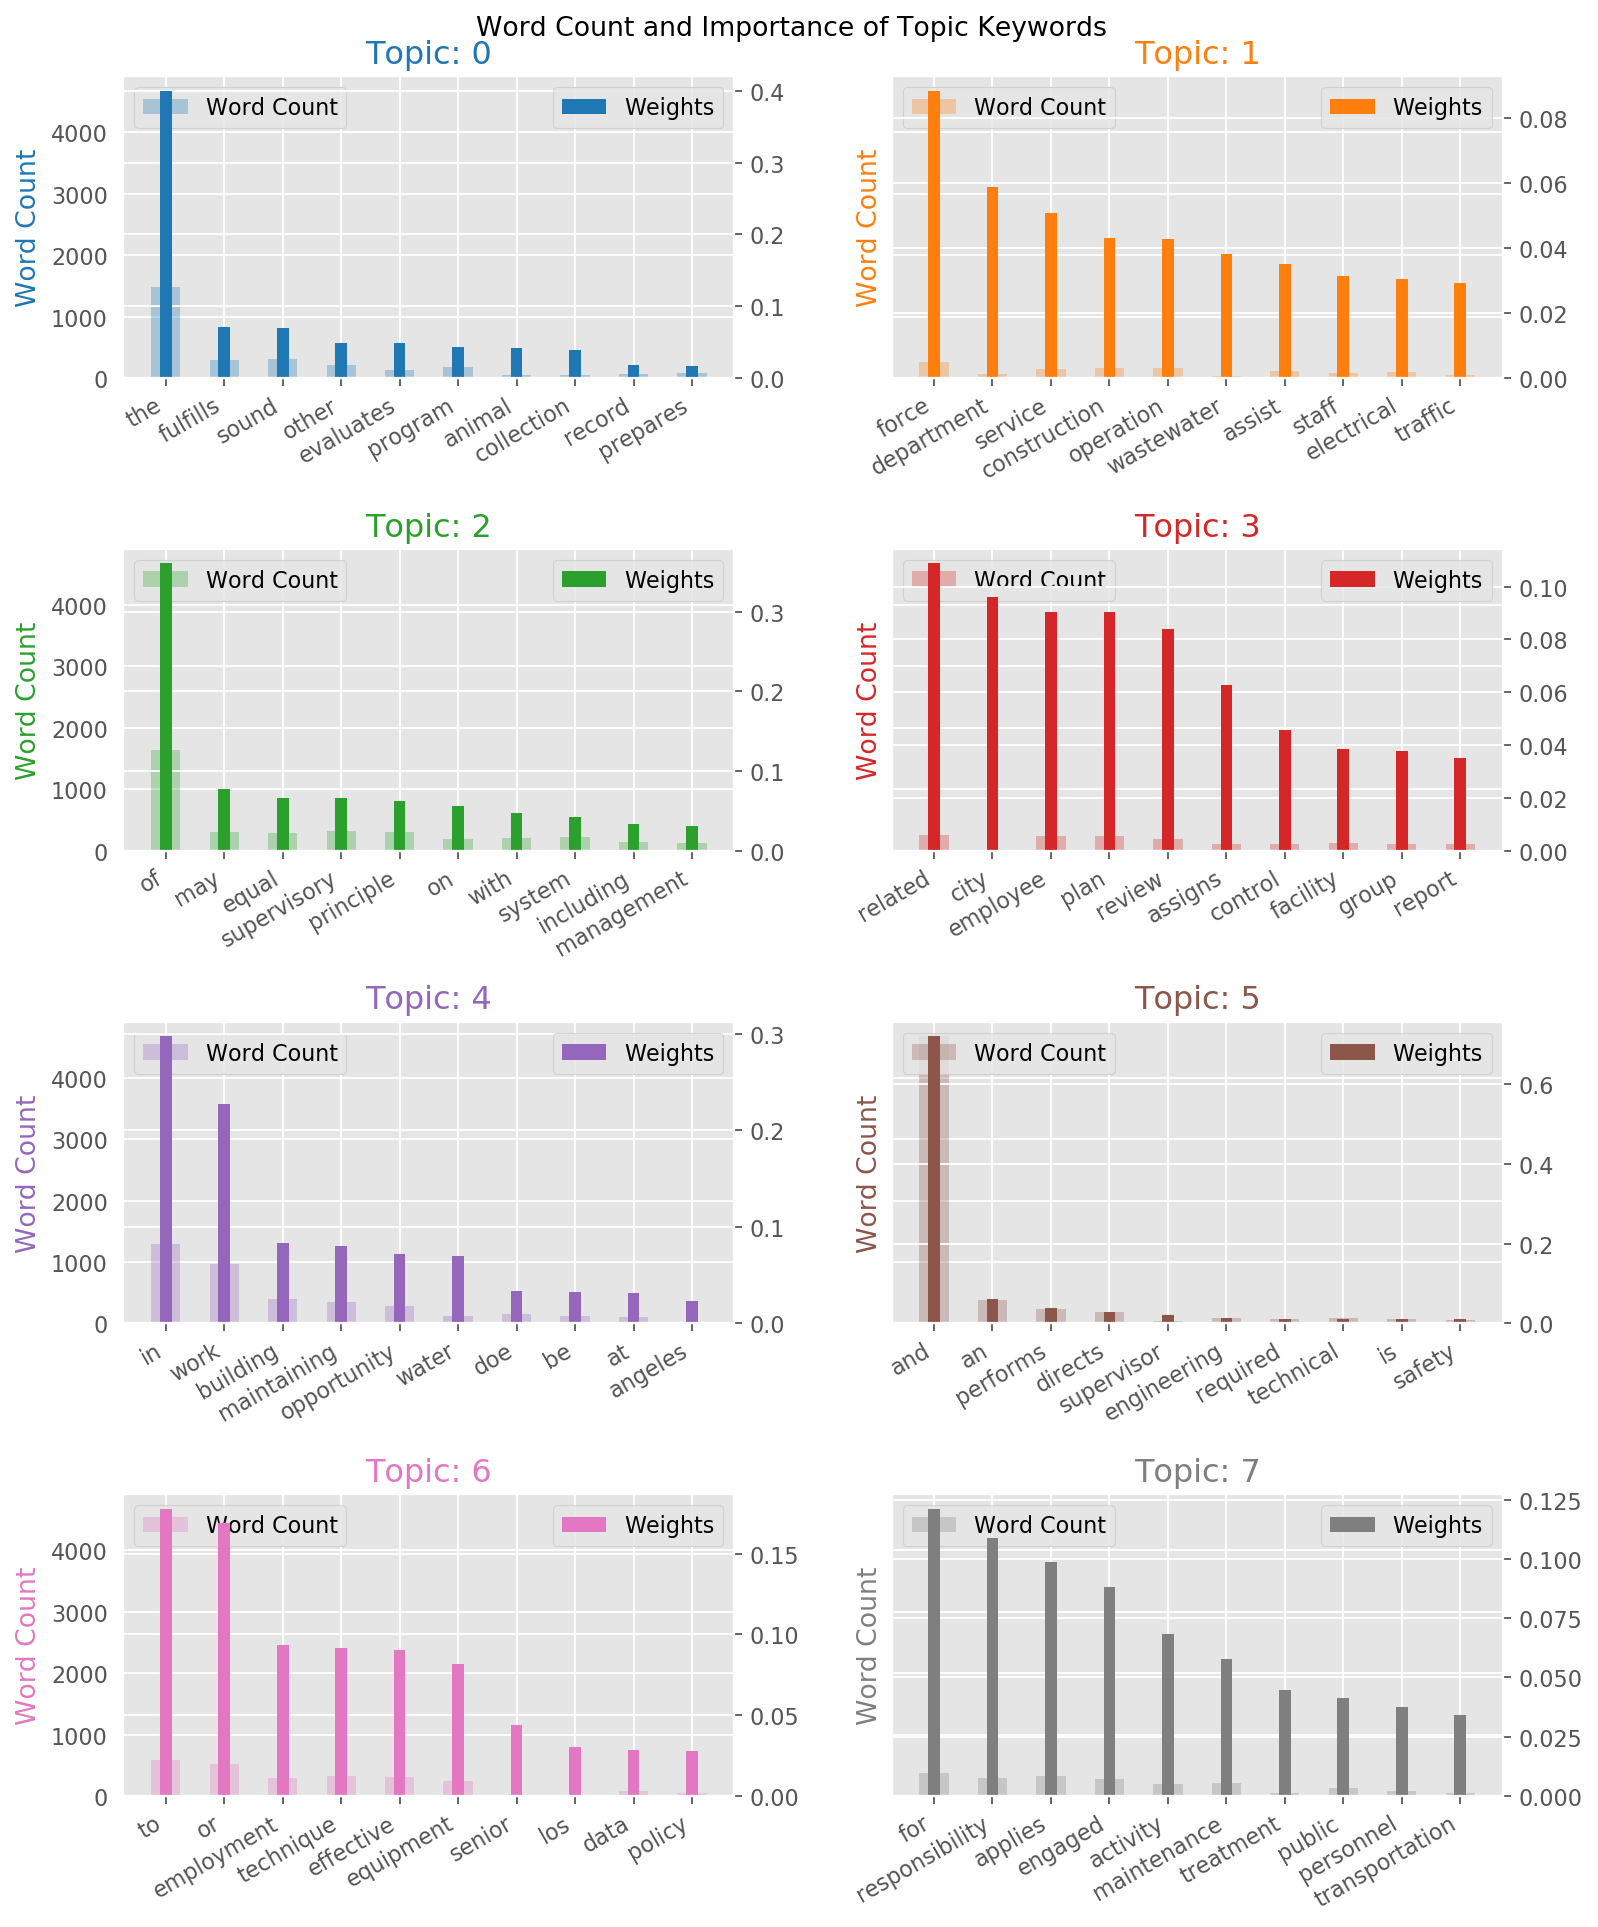

In [65]:
# Word Counts of Topic Keywords
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in build_corpus(df,'duties') for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_plot= pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(10,12), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_plot.loc[df_plot.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_plot.loc[df_plot.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.040); ax.set_ylim(0, 4000)
    ax.set_title('Topic: ' + str(i), color=cols[i])
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_plot.loc[df_plot.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords',y=1)    
plt.show()

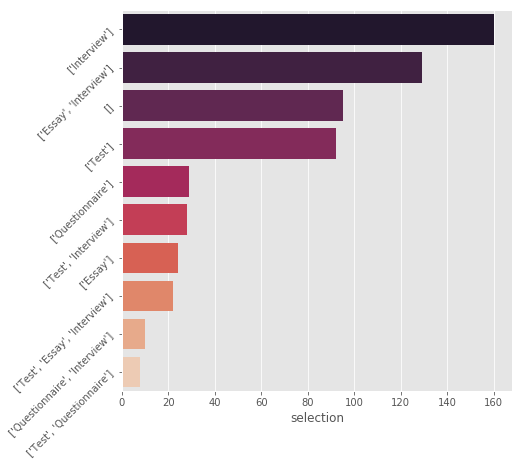

In [66]:
# What are the most common selection criterias?
plt.figure(figsize=(7,7))
count=df['selection'].astype(str).value_counts()[:10]
sns.barplot(y=count.index,x=count,palette='rocket')
plt.gca().set_yticklabels(count.index,rotation='45')
plt.show()

In [67]:
# Finding and removing gender biases
# Is there any Gender bias in job bulletins?
def pronoun(data):
    
    '''function to tokenize data and perform pos_tagging.Returns tokens having "PRP" tag'''
    
    prn=[]
    vrb=[]
    token=word_tokenize(data)
    pos=pos_tag(token)
   
    vrb=Counter([x[0] for x in pos if x[1]=='PRP'])
    
    return vrb
    


req_prn=pronoun(req)
duties_prn=pronoun(duties)
print('pronouns used in requirement section are')
print(req_prn.keys())
print('\npronouns used in duties section are')
print(duties_prn.keys())

pronouns used in requirement section are
dict_keys(['You', 'offset', 'or8', 'or4', 'orB', 'orb', 'I', 'they', 'or7', 'you', 'or3', 'or6', 'it', 'orc', 'ore.', 'or5', 'or2'])

pronouns used in duties section are
dict_keys(['You', 'They', 's', 'it', 'I', 'they', 'you', 'or2'])


In [68]:
# Is there any gender bias in job titles?
names=['senior waterman','policeman']
for name in names:
    z=re.match(r'\w+?\s?\w+(man|women)$',name)
    print(z)

<_sre.SRE_Match object; span=(0, 15), match='senior waterman'>
<_sre.SRE_Match object; span=(0, 9), match='policeman'>


In [69]:
for name in df['Position']:
    z=re.match(r'\w+?\s?\w+(man|women)$',name)
    if z is not None:
        print(z)

# <center>Clustering </center>

In [70]:
# Clustering jobs
# Finding similar jobs
def similar_jobs(job):
    
    ''' function to find and return jobs with similar job title.take a single argument
            - job title
            returns
                -list of similar jobs '''
    
    word1=word_tokenize(job)
    jobs=[]
    for i,name in enumerate(df['Position']):
        word2=word_tokenize(name)
        distance=jaccard_distance(set(ngrams(word1,n=1)),set(ngrams(word2,n=1)))
        if(distance<.55):
            jobs.append((name,i))
    return jobs

In [71]:
similar_jobs(df['Position'][10])

[('airport aide', 10)]

In [72]:
# Finding jobs with similar requirements
def similar_req(job):
    
    ''' function to find and return jobs with similar job title.take a single argument
            - job title
            returns
                -list of similar jobs '''
    
    word1=word_tokenize(job)
    jobs=[]
    for i,name in enumerate(df['requirements']):
        word2=word_tokenize(name)
        distance=jaccard_distance(set(ngrams(word1,n=1)),set(ngrams(word2,n=1)))
        if(distance<.5):
            jobs.append((name,df.iloc[i]['Position']))
    return jobs

In [73]:
similar_req(df['requirements'][10])

[('One year of full-time paid experience as an Airport Guide with the Los Angeles World Airports assisting executive management and/or elected officials.',
  'airport aide')]

In [74]:
df['requirements'][312]

'1. Completion of 12 semester units or 18 quarter units in drafting, including 3 semester or 4 quarter units in Computer Aided Drafting Design (CADD) and 6 semester or 9 quarter units in mathematics, at an accredited college, trade school or technical school; or2. Two years of full-time paid engineering drafting experience, one year of which was in mechanical engineering drafting.'

In [75]:
# Readability Index
'''Flesch Index ------- Text file reading Grade

0-30 --------- College

50-60 --------- High School

90-100 --------- Fourth Grade '''

reading=[]
for file in df['File Name']:
    text=open("CityofLA/Job Bulletins/"+file,'r',encoding="ISO-8859-1").read()
    sentence = text.count('.') + text.count('!') + text.count(';') + text.count(':') + text.count('?')
    words = len(text.split())
    syllable = 0
    for word in text.split():
        for vowel in ['a','e','i','o','u']:
            syllable += word.count(vowel)
        for ending in ['es','ed','e']:
            if word.endswith(ending):
                   syllable -= 1
        if word.endswith('le'):
            syllable += 1
            
    G = round((0.39*words)/sentence+ (11.8*syllable)/words-15.59)
    reading.append(G)

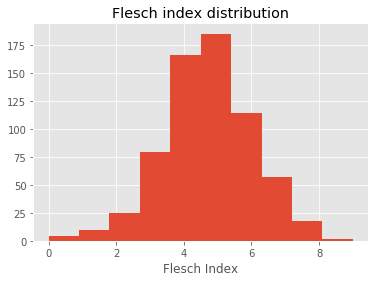

In [76]:
# Plotting Grade level distribution
plt.hist(reading)
plt.xlabel('Flesch Index')
plt.title('Flesch index distribution')
plt.show()